In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def plot_population_pyramid(input_df: pd.DataFrame, year) -> plt.Figure:
    df = input_df.copy(deep=True)
    # Data preparation
    total_population = df['M'].sum() + df['F'].sum()
    df['m_percentage'] = (df['M'] / total_population) * 100
    df['f_percentage'] = (df['F'] / total_population) * 100
    df['m_percentage'] = df['m_percentage'] * -1
    # Age Group order
    order = list(df['Age'].unique())
    order.reverse()
    # Figure
    fig, ax = plt.subplots(figsize=(16, 10), facecolor='w')

    # Males
    sns.barplot(data=df, x='m_percentage', y='Age', color='skyblue',  order=order, lw=0, ax=ax)
    for i, value in enumerate(df['m_percentage']):
        index = 20 - i
        # Percentage Label
        label = str(round(abs(value), 2)) + ' %'
        ax.text(x=value, y=index, s=label, ha='right', va='center')
        # Absolute Label
        abs_vals = df['M'].to_list()
        label_threshold = 0.5
        if abs(value) > label_threshold:
            label = str(round(abs_vals[i]))
            formatted_label = "{:,}".format(int(label))
            ax.text(x=-0.1, y=index, s=formatted_label, ha='right', va='center')

    # Females
    sns.barplot(data=df, x='f_percentage', y='Age', color='pink', order=order, lw=0, ax=ax)
    for i, value in enumerate(df['f_percentage']):
        index = 20 - i
        # Percentage Label
        label = str(round(abs(value), 2)) + ' %'
        ax.text(x=value, y=index, s=label, ha='left', va='center')
        # Absolute Label
        abs_vals = df['F'].to_list()
        label_threshold = 0.5
        if value > label_threshold:
            label = str(round(abs_vals[i]))
            formatted_label = "{:,}".format(int(label))
            ax.text(x=0.1, y=index, s=formatted_label, ha='left', va='center')

    # Labels
    plt.suptitle(f'Population Pyramid Finland {year}', y=0.91, fontsize=15)
    ax.set(xlabel='Percentage of Total Population', ylabel=f'Age Group')
    # Legend
    ax.text(s='Female', x=2.2, y=0.9, fontsize=20)
    ax.text(s='Male', x=-3.5, y=0.9, fontsize=20)
    # Setting X ticks
    ax.set_xticks(range(-5, 6, 1))
    ax.set_xticklabels(['5%', '4%', '3%', '2%', '1%', '0%', '1%', '2%','3%', '4%','5%'])
    ax.grid('both')
    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.savefig(f'charts/population_pyramid_{year}.png', bbox_inches='tight')
    plt.close()
    return fig


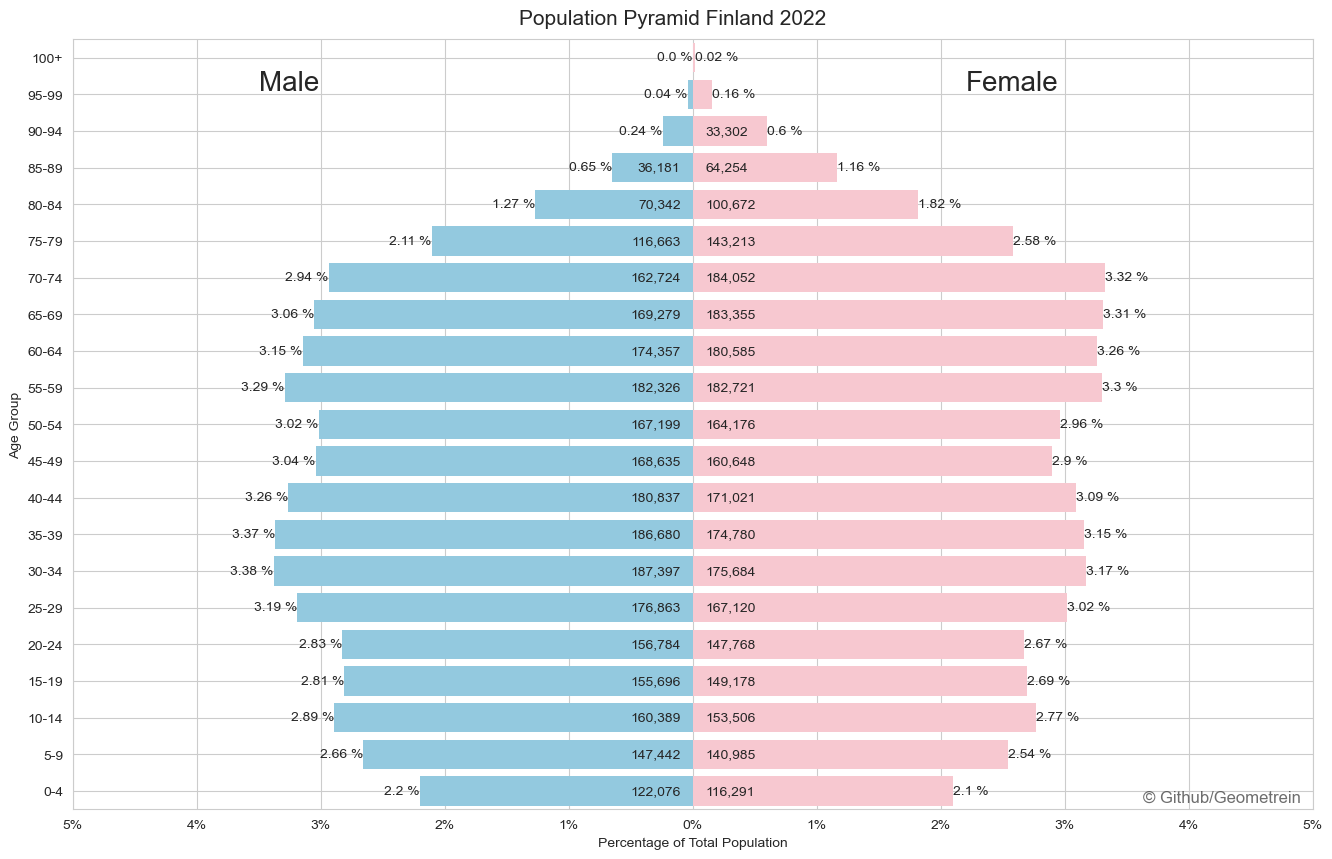

In [7]:
year = 2022
path = os.path.join('data', 'population_structure', f'finland_population_pyramid_{year}.csv')
pop_pyramid_df = pd.read_csv(path)
plot_population_pyramid(input_df=pop_pyramid_df, year=year)

In [8]:
def plot_multiple_years(start: int=2000, end: int=2022) -> None:
    dfs = []
    for year in range(start, end + 1):
        path = os.path.join('data', 'population_structure', f'finland_population_pyramid_{year}.csv')
        pop_pyramid_df = pd.read_csv(path)
        pop_pyramid_df['year'] = year
        dfs.append(pop_pyramid_df)
        plot_population_pyramid(input_df=pop_pyramid_df, year=year)
    combined_df = pd.concat(dfs)
    min = combined_df['year'].min()
    max = combined_df['year'].max()
    output_path = os.path.join('data', 'population_structure', f'finland_combined_population_pyramid_{min}_{max}.csv')
    combined_df.to_csv(output_path, index=False, header=True)

plot_multiple_years()

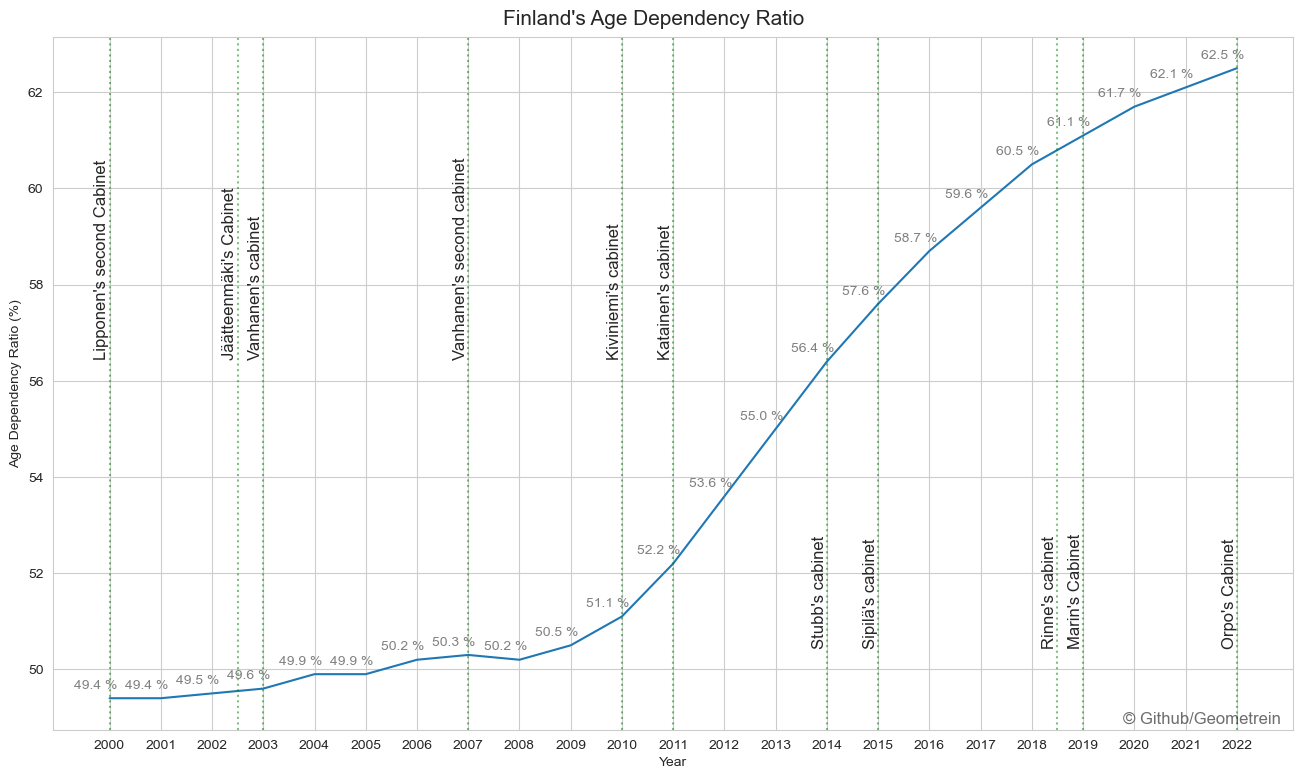

In [9]:
def plot_age_dependency_ratio_timeseries(input_df: pd.DataFrame) -> None:
    # Data
    data = {'year': [], 'ratio': []}
    for year in list(input_df['year'].unique()):
        yearly_df = input_df.loc[input_df['year']==year].copy(deep=True)
        yearly_df['total'] = yearly_df['M'] + yearly_df['F']
        dependents = ['0-4', '5-9', '10-14'] + ['65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']
        supporters = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']

        dependents_total = yearly_df[yearly_df['Age'].isin(dependents)]['total'].sum()
        supporters_total = yearly_df[yearly_df['Age'].isin(supporters)]['total'].sum()
        dependency_ratio =  (dependents_total / supporters_total) * 100
        data['year'].append(year)
        data['ratio'].append(round(dependency_ratio, 1))
    df = pd.DataFrame(data=data)

    # Figure
    fig, ax = plt.subplots(figsize=(16, 9), facecolor='w')
    sns.lineplot(x='year', y='ratio', data=df, ax=ax)
    plt.suptitle(f"Finland's Age Dependency Ratio", y=0.91, fontsize=15)
    ax.set(xlabel='Year', ylabel=f'Age Dependency Ratio (%)')
    ax.set_xticks(data['year'])

    # Add Annotations
    for index, row in df.iterrows():
        ax.annotate(str(row['ratio']) + ' %', xy=(row['year']-0.7, row['ratio']+0.2), color='grey')

    # Lipponen's second Cabinet
    ax.axvline(x=2000, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(1999.7, 56.5), text="Lipponen's second Cabinet", rotation=90, fontsize=12)

    # Jäätteenmäki's Cabinet Cabinet
    ax.axvline(x=2002.5, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2002.2, 56.5), text="Jäätteenmäki's Cabinet", rotation=90, fontsize=12)

    # Vanhanen's cabinet
    ax.axvline(x=2003, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2002.7, 56.5), text="Vanhanen's cabinet", rotation=90, fontsize=12)

    # Vanhanen's second cabinet
    ax.axvline(x=2007, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2006.7, 56.5), text="Vanhanen's second cabinet", rotation=90, fontsize=12)

    # Kiviniemi's cabinet
    ax.axvline(x=2010, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2009.7, 56.5), text="Kiviniemi's cabinet", rotation=90, fontsize=12)

    # Katainen's cabinet
    ax.axvline(x=2011, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2010.7, 56.5), text="Katainen's cabinet", rotation=90, fontsize=12)

    # Stubb's cabinet
    ax.axvline(x=2014, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2013.7, 50.5), text="Stubb's cabinet", rotation=90, fontsize=12)

    # Sipilä's cabinet
    ax.axvline(x=2015, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2014.7, 50.5), text="Sipilä's cabinet", rotation=90, fontsize=12)

    # Rinne's cabinet
    ax.axvline(x=2018.5, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2018.2, 50.5), text="Rinne's cabinet", rotation=90, fontsize=12)

    # Marin's Cabinet
    ax.axvline(x=2019, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2018.7, 50.5), text="Marin's Cabinet", rotation=90, fontsize=12)

    # Orpo Cabinet
    ax.axvline(x=2022, color='green', linestyle=':', alpha=0.5)
    ax.annotate(xy=(2021.7, 50.5), text="Orpo's Cabinet", rotation=90, fontsize=12)

    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.savefig(f'charts/age_dependency_vs_cabinets.png', bbox_inches='tight')
    plt.show()

path = os.path.join('data', 'population_structure', f'finland_combined_population_pyramid_2000_2022.csv')
combined_df = pd.read_csv(path)
plot_age_dependency_ratio_timeseries(input_df=combined_df)